In [10]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import time
from moviepy.editor import VideoFileClip

In [1]:
#Road-detection from a traffic video-cam feed


import numpy as np
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('roadvideo2Trim.mp4')

while(cap.isOpened()):
    #frame by frame of video
    ret, image = cap.read()
       
    #creating empty image of same size
    height, width, no_use = image.shape
    empty_img = np.zeros((height, width), np.uint8)

    
    
    #APPLIED K-MEANS CLUSTERING
    Z = image.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 6
    ret,label,center=cv2.kmeans(Z,K,None,criteria,15,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image.shape))
    
    
    
    #CONVERTED TO A LUV IMAGE AND MADE EMPTY IMAGE, A MASK
    blur = cv2.GaussianBlur(res2,(15,15),0)
    gray = cv2.cvtColor(blur,cv2.COLOR_RGB2GRAY)
    LUV = cv2.cvtColor(blur,cv2.COLOR_RGB2LUV)
    l = LUV[:,:,0]
    v1 = l>80
    v2 = l<150
    value_final = v1 & v2 
    empty_img[value_final] = 255
    empty_img[LUV[:,:100,:]] = 0
    
    
    #APPLIED BITWISE-AND ON GRAYSCALE IMAGE AND EMPTY IMAGE TO OBTAIN ROAD AND SOME-OTHER IMAGES TOO
    final = cv2.bitwise_and(gray,empty_img)
    final, contours, hierchary = cv2.findContours(final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    final = cv2.drawContours(final, contours, -1, 0, 3)
    
    
    
    #FURTHER MASKED THE FINAL IMAGE TO OBTAIN ONLY THE ROAD PARTICLES
    final_masked = np.zeros((height, width), np.uint8)
    v1 = final >=91
    v2 = final <=130
    #v3 = final == 78    
    final_masked[v1 & v2] = 255
    
    
    #APPLIED EROSION,CONTOURS AND TOP-HAT TO REDUCE NOISE
    kernel = np.ones((3,3),np.uint8)
    final_eroded = cv2.erode(final_masked,kernel,iterations=1) 
    final_eroded, contours, hierchary = cv2.findContours(final_eroded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    final_masked = cv2.drawContours(final_eroded, contours, -1, 0, 3)
    
    final_waste = cv2.morphologyEx(final_masked,cv2.MORPH_TOPHAT,kernel, iterations = 2) 
    final_waste = cv2.bitwise_not(final_waste)
    final_masked = cv2.bitwise_and(final_waste,final_masked)
    
    
    
    #MADE A LINE ON THE LEFT-BOTTOM OF THE PAGE
    final_masked = cv2.line(final_masked,(40,height),(400,height),255,100)
    #final_masked = cv2.line(final_masked,(width-300,height),(width,height),255,70)

    
    
    #USED FLOOD-FILL TO FILL IN THE SMALL BLACK LANES
    final_flood = final_masked.copy()
    h, w = final_masked.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(final_flood,mask,(0,0),255)
    final_flood = cv2.bitwise_not(final_flood)
    final_filled= cv2.bitwise_or(final_masked,final_flood)
    
    
    #final_blurred = cv2.GaussianBlur(final_filled,(5,5),0)
    
    cv2.namedWindow('original', cv2.WINDOW_NORMAL)
    cv2.imshow('original',image)
    cv2.namedWindow('tried_extraction', cv2.WINDOW_NORMAL)
    cv2.imshow('tried_extraction',final_filled)
    
    
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: not enough values to unpack (expected 3, got 2)

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image

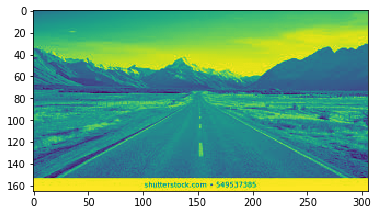

In [2]:
#image sample

img_dir = 'road pic.jpg'
image =  plt.imread(img_dir)
#plt.imshow(image)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)

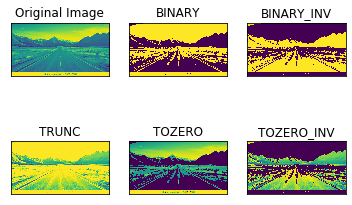

In Grayscale


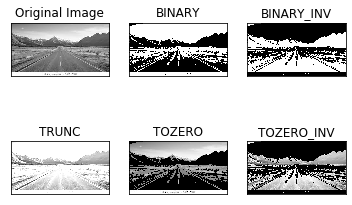

In [3]:
##Comparison Between Coloured And Grayscale Images
img = cv2.imread(img_dir,0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

print('In Grayscale')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

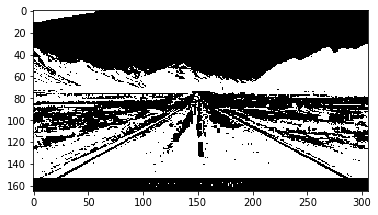

In [4]:
plt.imshow(thresh2, 'gray')

NameError: name 'image' is not defined

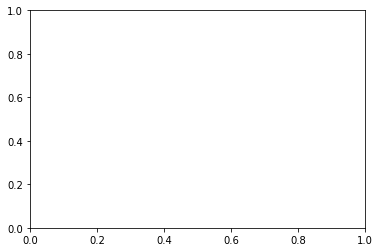

In [3]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.imshow(image)

perspective = [
(0, 200, 214, 200),
(0, 150, 214, 150),
(0, 110, 214, 110),
(0, 75, 214, 75),
(0, 40, 214, 40),
    
(5, 0, 0, 213),
(50, 0, 43, 213),
(100, 0, 100, 213),
(145, 0, 150, 213),
(190, 0, 200, 213),
]

for l1, c1, l2, c2 in perspective:
    ax.plot([l1, l2], [c1, c2], linewidth = 1.5, c = 'r')

plt.show()

In [9]:
crack_images = os.listdir('Positive/')
print("Number of Crack Images: ", len(crack_images))

NameError: name 'os' is not defined

In [8]:
no_crack_images = os.listdir('Negative/')
print("Number of No Crack Images: ", len(no_crack_images))

NameError: name 'os' is not defined

In [7]:

## Visualize Random images with cracks
random_indices = np.random.randint(0, len(crack_images), size=4)
print("*****************Random Images with Cracks**************************")
random_images = np.array(crack_images)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, 'Positive', random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, 'Positive', random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, 'Positive', random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, 'Positive', random_images[3])))

NameError: name 'crack_images' is not defined

In [6]:
def predict_on_crops(input_image, height=227, width=227, save_crops = False):
    im = cv2.imread(input_image)
    imgheight, imgwidth, channels = im.shape
    k=0
    output_image = np.zeros_like(im)
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            a = im[i:i+height, j:j+width]
            ## discard image cropss that are not full size
            predicted_class = predict(base_model,Image.fromarray(a))
            ## save image
            file, ext = os.path.splitext(input_image)
            image_name = file.split('/')[-1]
            folder_name = 'out_' + image_name
            ## Put predicted class on the image
            if predicted_class == 'Positive':
                color = (0,0, 255)
            else:
                color = (0, 255, 0)
            cv2.putText(a, predicted_class, (50,50), cv2.FONT_HERSHEY_SIMPLEX , 0.7, color, 1, cv2.LINE_AA) 
            b = np.zeros_like(a, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(a, 0.9, b, 0.1, 0)
            ## Save crops
            if save_crops:
                if not os.path.exists(os.path.join('real_images', folder_name)):
                    os.makedirs(os.path.join('real_images', folder_name))
                filename = os.path.join('real_images', folder_name,'img_{}.png'.format(k))
                cv2.imwrite(filename, add_img)
            output_image[i:i+height, j:j+width,:] = add_img
            k+=1
    ## Save output image
    cv2.imwrite(os.path.join('real_images','predictions', folder_name+ '.jpg'), output_image)
    return output_image

In [5]:
plt.figure(figsize=(10,10))
output_image = predict_on_crops('real_images/concrete_crack1.jpg', 128, 128)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

NameError: name 'predict_on_crops' is not defined

<Figure size 720x720 with 0 Axes>

In [4]:
plt.figure(figsize=(10,10))
output_image = predict_on_crops('real_images/concrete_crack2.jpg')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

NameError: name 'predict_on_crops' is not defined

<Figure size 720x720 with 0 Axes>

In [3]:
plt.figure(figsize=(10,10))
output_image = predict_on_crops('real_images/road_surface_crack1.jpg', 128,128)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

NameError: name 'predict_on_crops' is not defined

<Figure size 720x720 with 0 Axes>

In [2]:

plt.figure(figsize=(10,10))
output_image = predict_on_crops('real_images/road_surface_crack3.jpg',128,128)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

NameError: name 'predict_on_crops' is not defined

<Figure size 720x720 with 0 Axes>